Import libraries

In [1]:
suppressMessages(library('ggplot2'))
suppressMessages(library('dplyr'))
suppressMessages(library('repr'))
suppressMessages(library('GoFKernel'))

library(GoFKernel)
library(repr) 
library(dplyr)
library(ggplot2)
library(polynom)

# Exercise 1

a set of measurements have been performed on the concentration of a contaminant in tap water. The following tables reports a set of values (x), with the corresponding probabilities given by the two methods (p1 and p2)

x 15.58 15.9 16 16.1 16.2

p1 0.15 0.21 0.35 0.15 0.14

p2 0.14 0.05 0.64 0.08 0.09

Evaluate the expected values, E[X], and the variance, V ar(X), for both methods

In [2]:
x  <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

expt <- function(x,p){
    sum(x*p)/sum(p) #divide by sum(p) in case p not normalized
}

variance <- function(x,p){
    sum(p*(x-expt(x,p))**2)/sum(p) #divide by sum(p) in case p not normalized, variance is mean value of (x - E(x))^2, the second momentum
}

paste('Expected value of p1 : ', round(expt(x,p1), 3), ', variance: ', round(variance(x,p1), 3))
paste('Expected value of p2 : ', round(expt(x,p2), 3), ', variance: ', round(variance(x,p2), 3))

[1] "Expected value of p1 :  15.959 , variance:  0.034"

[1] "Expected value of p2 :  15.962 , variance:  0.028"

# Exercise 2

the waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30

*a) simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram*

*b) what is the probability that a person will wait for less than 10 minutes?*

*c) evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)*

*d) what is the probability for waiting more than one hour before being received?*

The waiting time (measured in minutes) is an exponentially distributed random variable with rate $1/30$; calling the random variable $t$, $t$ is then sampled according to the distribution: $ f(t) = \lambda e^{- \lambda t}$.
From theory, the expected value of the exponential distribution is $E[x]=\frac{1}{\lambda}=30$. In the exercise, the mean value will both be computed numerically with the definition, and extracted from the simulated data. 

Furthermore, a simulation is made of the trend of the average as the sample considered varies.

From the plot it can be seen that even though the result oscillates wildly when the population size is small, the mean value quickly settles around the expected mean.

[1] "probability of waiting less than 10 minutes:  0.283"

[1] "mean of simulated data (mean function used):  29.851 , theoretical mean value:  30 , compatibility:  0.004"

[1] "numerical mean estimate (through integration):  29.9999999999382"

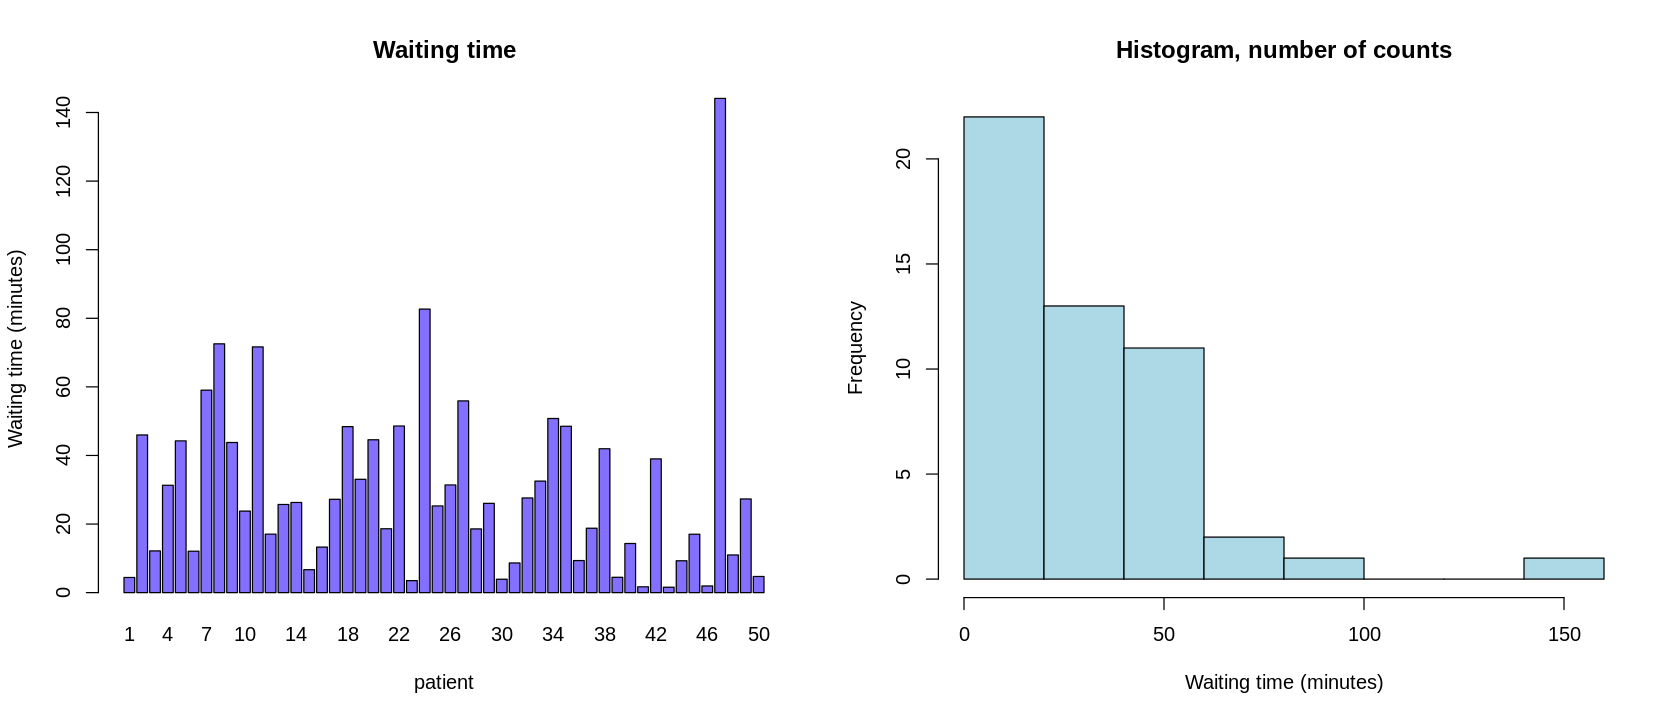

[1] "the probability to wait more than one hour is 0.135"

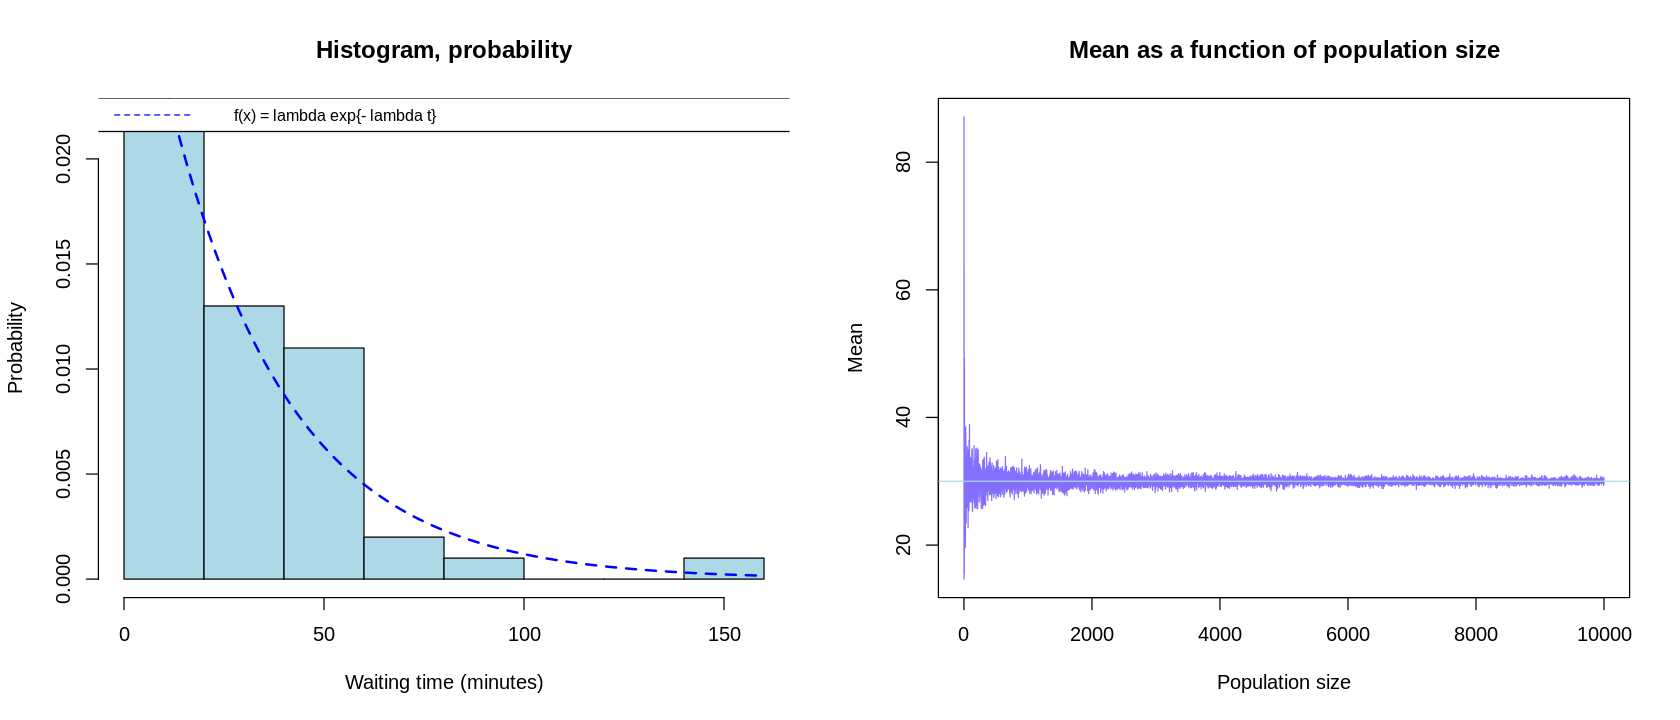

In [3]:
#A
lambda <- 1/30
samples <- rexp(50, rate = lambda)

par(mfrow = c(1,2))
options(repr.plot.width = 14, repr.plot.height = 6)

#plot of waiting times
barplot(samples, names = 1:50, col = 'lightslateblue', main = 'Waiting time', xlab = 'patient', ylab = 'Waiting time (minutes)')


#plot histogram with frequency of waiting times
hist(samples, col = 'lightblue', main = 'Histogram, number of counts',xlab = 'Waiting time (minutes)', breaks = 10)


#plot histogram with probability density, NB: prob = T same as writing freq = F
hist(samples, prob = T, main = 'Histogram, probability', xlab = 'Waiting time (minutes)', ylab = 'Probability', col = 'lightblue', breaks = 10)
curve(dexp(x, rate = lambda), add = T, lty=2, lwd=2, col = 'blue') # add = TRUE to stack the two plots
legend('top', 'f(x) = lambda exp{- lambda t}', col='blue', lty = 2, cex = 0.8)



#B : this is given by the cumulative distribution, evaluated at t=10
p10 <- pexp(10, lambda)
paste('probability of waiting less than 10 minutes: ', round(p10,3))



#C
meanwait <- mean(samples)
stdwait <- sd(samples)
th_average <- 1/lambda

comp_th <- abs(meanwait - th_average)/(sqrt(2)*stdwait)

paste('mean of simulated data (mean function used): ', round(meanwait ,3), ', theoretical mean value: ', round(th_average,3), ', compatibility: ', round(comp_th,3))

numerical_meanwait <- integrate(function(x){x*dexp(x, rate = lambda)}, 0, Inf)$value #integration to find the mean value

paste('numerical mean estimate (through integration): ', numerical_meanwait) #round(numerical_meanwait,3))



#test that when the number of trials increases the mean calculated through the pdf converges to the expectation value


mean_variable_samples <- Vectorize(function(pts, lambda) mean(rexp(pts, rate = lambda)))                       

points <- 10000 #points used to evaluate the mean

options(repr.plot.width = 14, repr.plot.height = 6)
curve(mean_variable_samples(x, lambda), from = 1, to = points, col = 'lightslateblue', n = points, xlab = 'Population size', ylab = 'Mean', main = 'Mean as a function of population size')
abline(h = 30, col = 'lightblue') # add a straigh line
                                     
#even though the result oscillates wildly when the population size is small
#the mean value settles around the expected mean = 30

                                   


#D
p1hour <- pexp(60, rate = lambda, lower.tail = FALSE) #want to compute the probability time greater than one hour, so from x up, done with lower tail
paste('the probability to wait more than one hour is', round(p1hour, 3))

# Exercise 3

let’s suppose that on a book, on average, there is one typo error every three pages.
If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the book.

Since the expected value of the Poisson distribution is $\lambda$, I consider $\lambda=1/3$ with time unit 1 page.

[1] "probability that there is at least one error on a specific page of the book:  0.283"

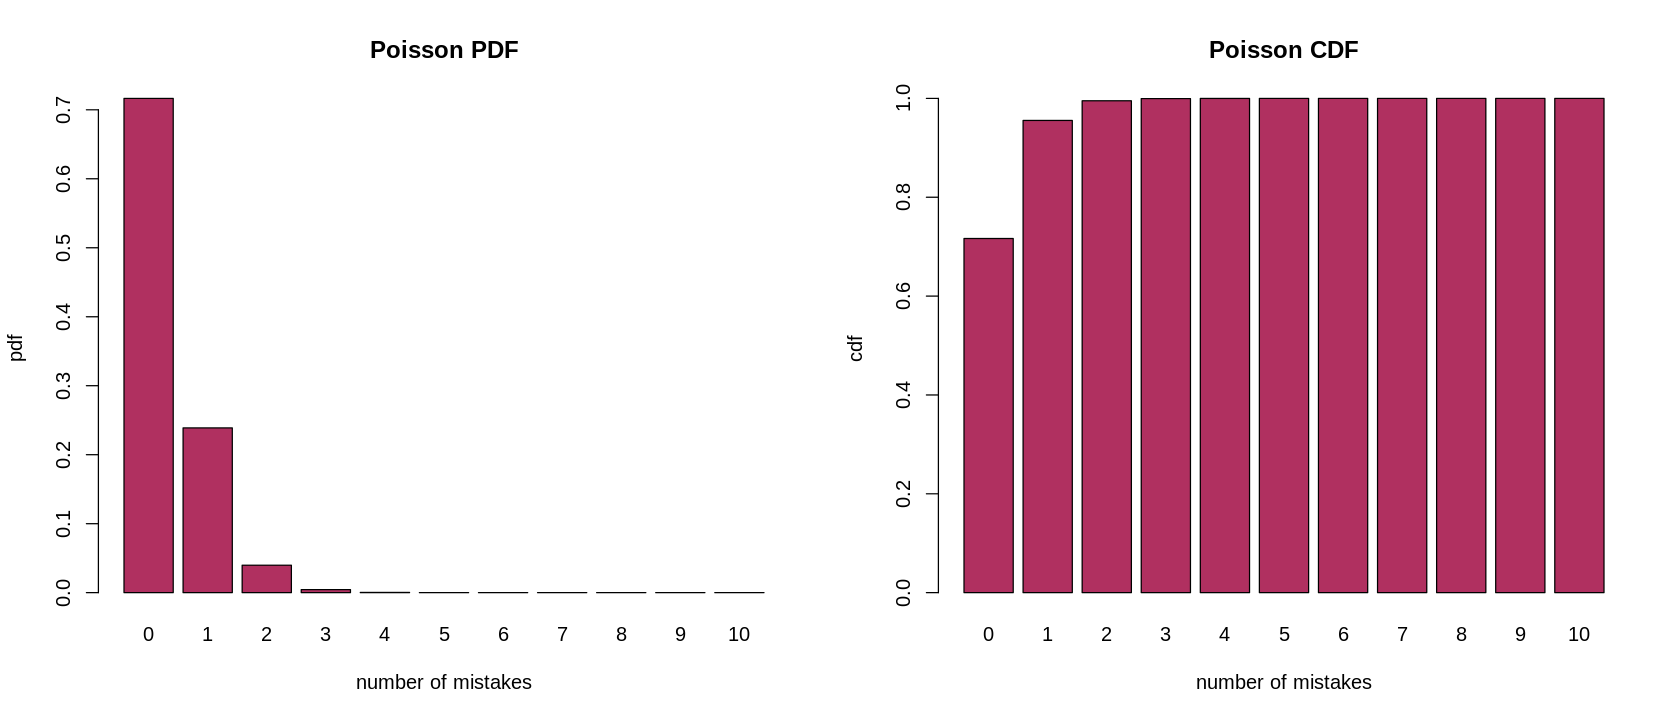

In [4]:
lambda <- 1/3
t <- 0:10

# define pdf and cdf
pdf <- dpois(t, lambda)
cumul <- ppois(t, lambda)



# plot
par(mfrow = c(1,2))
options(repr.plot.width = 14, repr.plot.height = 6)

barplot(pdf, names = t, col = 'maroon', main = 'Poisson PDF', xlab = 'number of mistakes', ylab = 'pdf')
barplot(cumul, names = t, col = 'maroon', main = 'Poisson CDF', xlab = 'number of mistakes', ylab = 'cdf')

paste('probability that there is at least one error on a specific page of the book: ', round(1-pdf[1],3))

# Exercise 4

we randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.


The probability of drawing 1 ace from a deck of 52 card is $p = \frac{4}{52} =\frac{1}{13}$.

The probability that at least 10 trials are needed until one ace is drawn is equal to the probability of having 0 successes in the first 9 trials.
This can be calculated using either the binomial distribution or geometric distribution, since in the last case the probability we want to compute is to have the first success after 10 or more trials.

Given a random variable $X$, $P(X \leq x)$ can be computed through the cdf function associated to the pdf, and that $P(X \geq x) = 1 - P(X \leq x)$ ; the function used then will be *pgeom* R function.

In R, the geometric distribution is computed indicating the number of failures needed to get the first success.

So, given that $1 - P(X \leq x) = P(X \geq x)$ considering $X$ is the number of failures before the first success, we want it to be greater than or equal to 9, so the problem is solved computing $ P(X \leq 8) = pgeom(8,p) $.

[1] "probability that at least 10 draws are needed (geometric distribution):  0.487"

[1] "probability that at least 10 draws are needed (binomial distribution):  0.487"

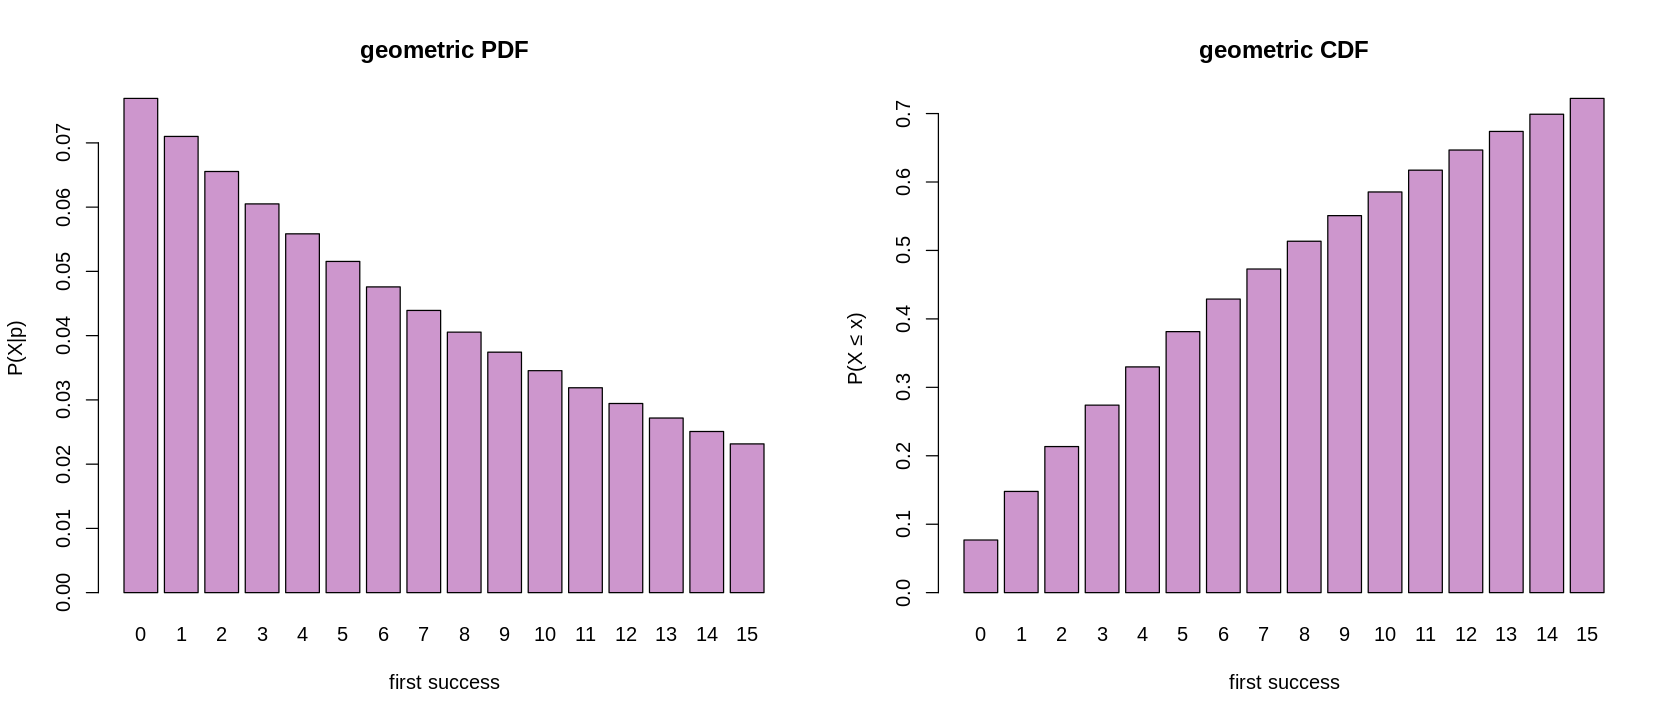

In [5]:
p <- 1/13 # Number of aces over number of cards, probability of drawing one ace
t <- 0:15

# define pdf and cdf
pdf <- dgeom(t, p)
cumul <- pgeom(t, p)



# plot
par(mfrow = c(1,2))
options(repr.plot.width = 14, repr.plot.height = 6)
#plot(t, pdf, type = 'b', col = 'orange', main = 'geometric PDF', xlab = 'first success', ylab = 'P(X|p)')
#plot(t, cumul, type = 'b', col = 'orange', main = 'geometric CDF', xlab = 'first success', ylab = 'P(X ≤ x)')
barplot(pdf, names = t, col = 'plum3', main = 'geometric PDF', xlab = 'first success', ylab = 'P(X|p)')
barplot(cumul, names = t, col = 'plum3', main = 'geometric CDF', xlab = 'first success', ylab = 'P(X ≤ x)')



p10 <- 1 - pgeom(8, p)
paste('probability that at least 10 draws are needed (geometric distribution): ', round(p10, 3))


#The same result can be achieved using the Binomial distribution:
#we need to calculate the probability to have 0 successes in the first 9 trials.

p10_binom <- dbinom(0, 9, p) 
paste('probability that at least 10 draws are needed (binomial distribution): ', round(p10_binom, 3))

# Exercise 5

the time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form

\begin{equation}
f(t) = \left\{ 
    \begin{array}
        \ c(t-1)(2-t) \quad 1 < t < 2 \\ 0 \quad \text{otherwise}
    \end{array}
\right.
\end{equation}

where t is the time in hours.

*a) using the integrate() R function, determine the constant c (and verify it analytically)*

*b) write the set of four R functions and plot the pdf and cdf, respectively*

*c) evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take 90 and 120 minutes.*

In [6]:
#define function
func <- function(t, c = 1){
    if ( 1 < t && t < 2 ){c*(t-1)*(2-t)}
    else {0} 
}



#using the integrate() R function, determine the constant c
norm_const <- integrate(func, lower = 1, upper = 2)
C <- 1/norm_const$value
paste('The normalization constant is: ', C)

[1] "The normalization constant is:  6"

Analitically it can be verified that the value is correct:

$$
\int_1^2 c(t-1)(2-t) \ dt = c \int_1^2 (-t^2 + 3t - 2) \ dt = c \left[-\frac{t^3}{3} + 3\frac{t^2}{2} - 2t \right]^2_1 = c \left[ \left(- \frac{2}{3}\right) - \left(-\frac{5}{6}\right) \right] = \frac{c}{6} \overset{!}{=} 1 \implies c = 6
$$

### Defining the functions

- **PDF** : the pdf is given, so it suffices to implement it.

- **CDF**: by definition the cdf is the integral of the pdf; it is manually defined as a function defined by cases, altough the integration function can also be used.

From the calculations, once the normalization constant is set, it can be seen that the CDF is:
$$
F(t) = 5 -12t +9t^2 -2t^3 
$$

* **quantile function**: we need to invert the cdf, which is indeed bijiective in the $[1,2]$ interval. To do so, the `polynomial` R package is used.

- **random variable sampling function**: since the quantile function is defined, the inverse transform sampling method can be used.

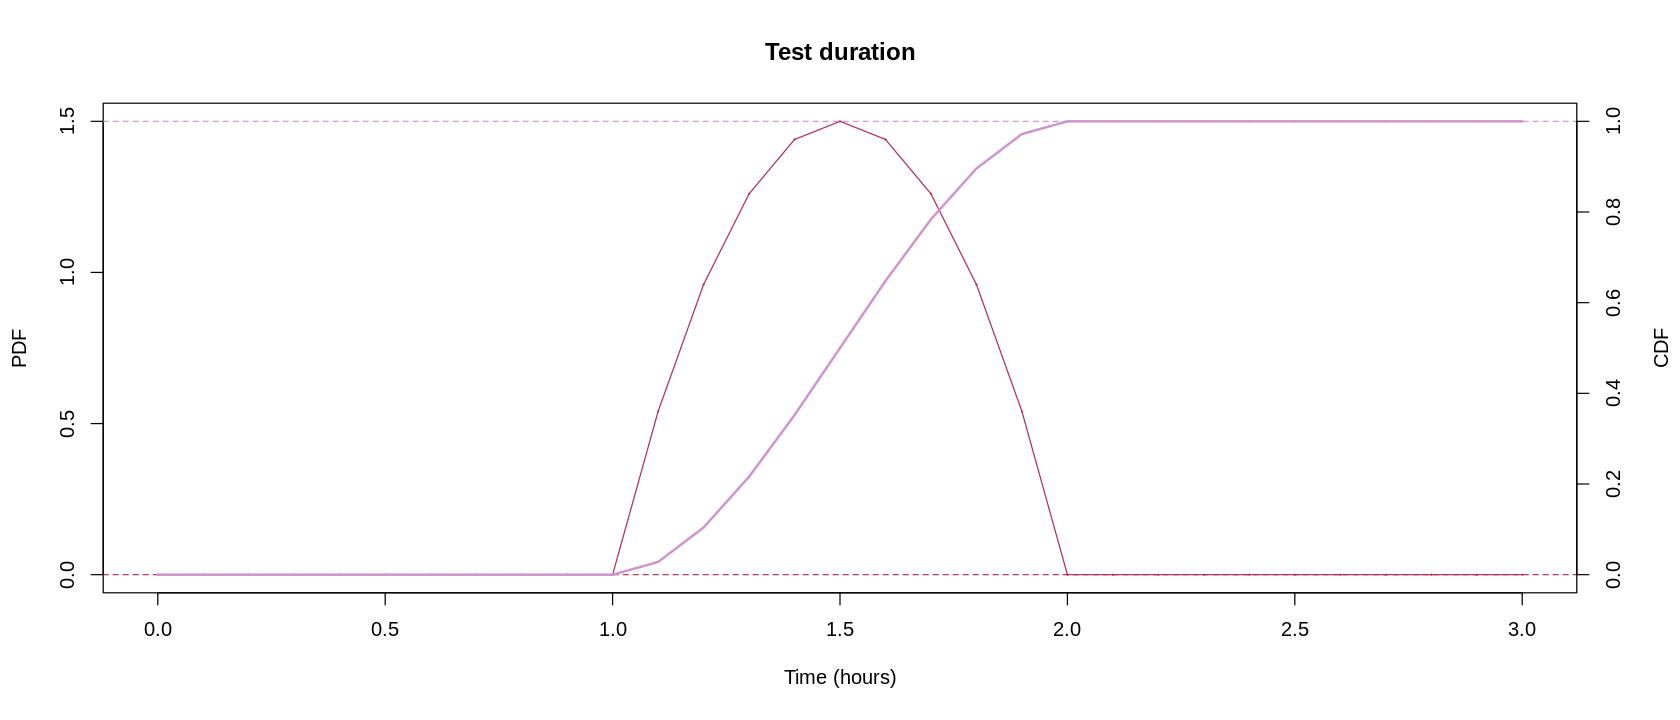

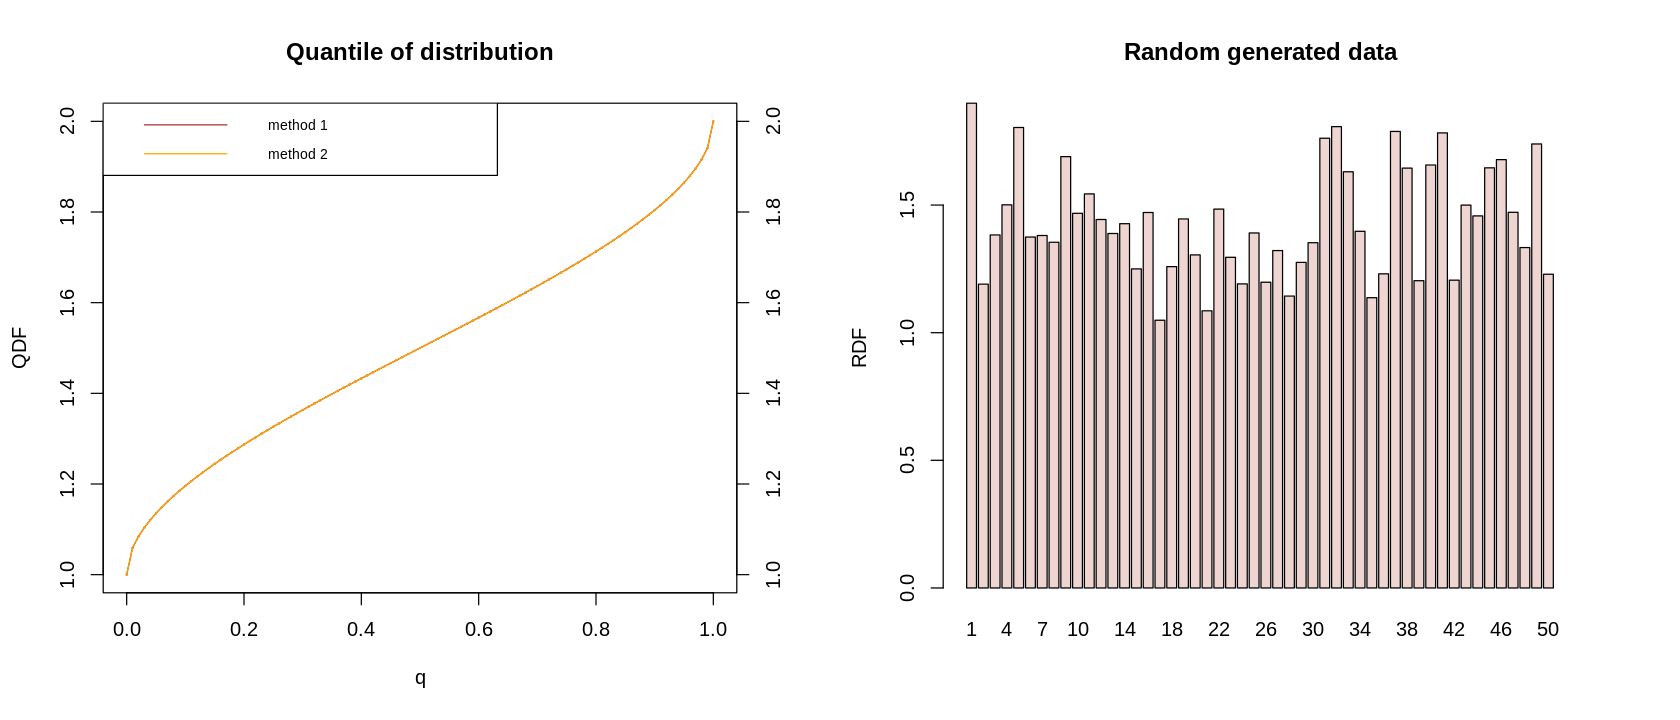

In [7]:
#NB: if and else are not vectorized, so to apply the function to a sequence we need to use sapply

#define pdf
dfunc <- function(t, c = C){
    if ( 1 < t && t < 2 ){c*(t-1)*(2-t)}
    else {0} 
}


#define cdf, could be more generic done by integration but it is computationally more expensive;
#for this reason I manually found the cdf and inserted its expression
pfunc <- function(t, c = C){
    if (t <= 1){0}
    else if (1 < t && t < 2 ){c*(3/2*t^2-t^3/3-2*t+5/6)}
    else {1}
}


#define quantile function, method 1
qdf <- inverse(pfunc, lower=1, upper=2) #invert cdf function



#define quantile function, method 2
qfunc <- function(p, c = C){ #invert cdf function
    pol <- polynomial(c(5-6*p/c, -12, 9, -2)) #polyroot: extract roots of 3-deg polinomial corresponding to the cdf for each p
    root <- solve(pol)
    Re(root[2])
}



#define rdf
rfunc <- function(n){
    t <- runif(n)
    sapply(t, qfunc)
}



#define sequence
x <- seq(0, 3, 0.1)

pdf_data <- sapply(x, dfunc) # same as Vectorize(dfunc)(x)
cdf_data <- sapply(x, pfunc) # same as Vectorize(pfunc)(x)



#plot pdf, cdf, qdf, rdf
options(repr.plot.width = 14, repr.plot.height = 6)
par(mar = c(5, 4, 4, 4) + 0.3)
plot(x, pdf_data, pch=20, cex=.1, col='maroon', xlab = 'Time (hours)',ylab='PDF', main ='Test duration', col.axis='black')
lines(x, pdf_data, col='maroon', lty = 1, lw = 1)
abline(h=0,lty=2, col='maroon')
par(new=TRUE)
plot(cdf_data, pch=20, cex=.1, col='plum3', xlab='', ylab='', yaxt='n', axes=FALSE)
lines(cdf_data, col='plum3', lty = 1, lw = 2)
abline(h=1,lty=2, col='plum3')
axis(side = 4, col='black', ylim=c(0,1), col.axis='black')
mtext('CDF', side = 4, line = 3)

invx <- seq(0, 1, 0.01)
q_data <- sapply(invx, qdf)
q_data2 <- sapply(invx, qfunc)

par(mfrow = c(1,2))

options(repr.plot.width = 6, repr.plot.height = 6)
plot(invx, q_data, pch=20, cex=.1, col='firebrick', xlab = 'q',ylab='QDF', main ='Quantile of distribution')
lines(invx, q_data, col = 'firebrick', lty = 1, lw = 1)
par(new=TRUE)
plot(invx, q_data2, pch=20, cex=.1, col='orange', xlab='', ylab='', yaxt='n', axes=FALSE)
lines(invx, q_data2, col='orange', lty = 1, lw = 1)
axis(side=4, col='black', ylim=c(0,1), col.axis='black')
legend('topleft', c('method 1', 'method 2'), col= c('firebrick', 'orange'), lty = 1, cex = 0.7, y.intersp = 2, text.width = strwidth(c('method 1', 'method 2'))[1]*0.75)

options(repr.plot.width = 14, repr.plot.height = 6)
barplot(rfunc(50), names =1:50, col = 'mistyrose2', main='Random generated data', ylab = 'RDF')

In [8]:
paste('probability that the student will finish the aptitude test in more than 75 minutes :', round(1-pfunc(1.25),3))
paste('probability that the student will finish the aptitude test in 90 to 120 minutes: ', round(pfunc(2)-pfunc(1.5), 3))

[1] "probability that the student will finish the aptitude test in more than 75 minutes : 0.844"

[1] "probability that the student will finish the aptitude test in 90 to 120 minutes:  0.5"

# Exercise 6

the lifetime of tires sold by an used tires shop is 104 · x km, where x is a random variable following the distribution function
$$
f(X) = \left\{ \begin{array}{2}
2/x^2 & 1<x<2 \\
0 & \mbox{otherwise}
\end{array}
\right.
$$

*a) write the set of four R functions and plot the pdf and cdf, respectively*

*b) determine the probability that tires will last less than 15000 km*

*c) sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression Var(X) = E[X^2] − E[X]^2*

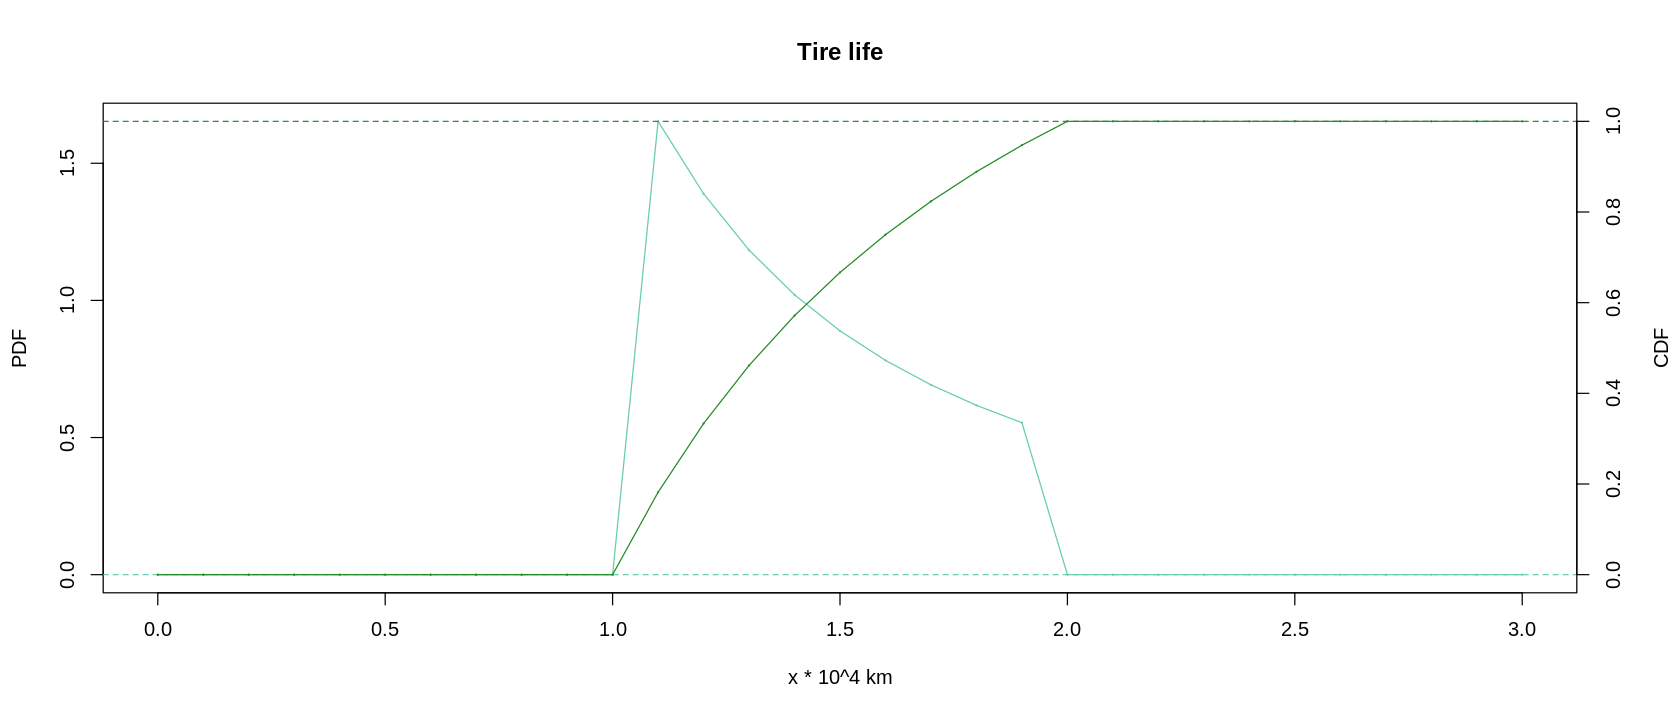

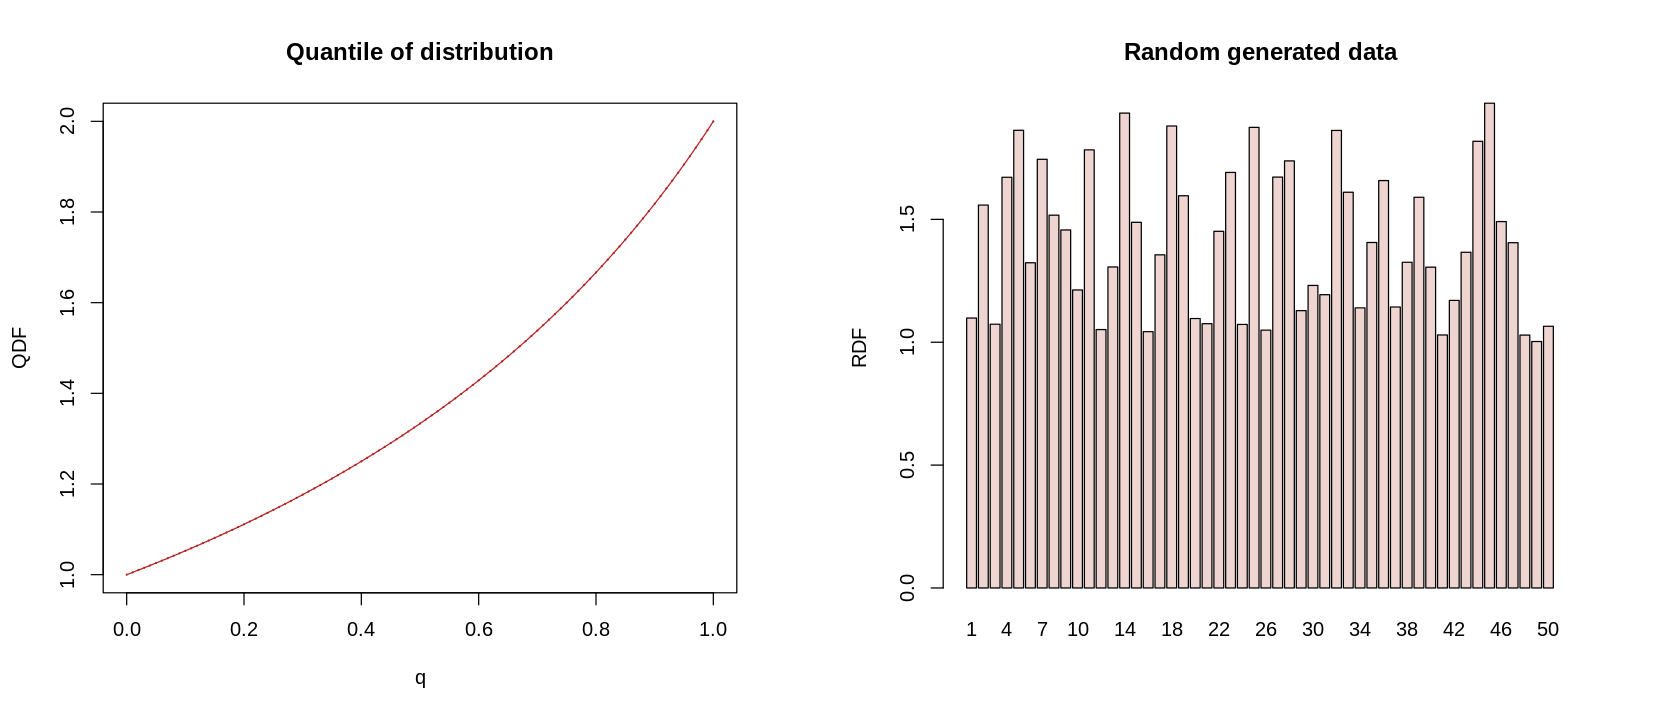

In [9]:
#define pdf
df <- function(x){
    if ( 1 < x && x < 2){2/x^2}
    else {0} 
}


#define cdf
pf <- function(x){
    if (x <= 1){0}
    else if (x >= 2){1}
    else {2-2/x}
}


#define quantile function
qf <- function(x){
    2/(2-x) #invert cdf function
}


#define rdf
rf <- function(n){
    x <- runif(n)
    sapply(x, qf)
}

#define sequence
x <- seq(0, 3, 0.1)

pdf_data <- sapply(x, df) # same as Vectorize(dfunc)(x)
cdf_data <- sapply(x, pf) # same as Vectorize(pfunc)(x)



#plot pdf, cdf, qdf, rdf
options(repr.plot.width = 14, repr.plot.height = 6)
par(mar = c(5, 4, 4, 4) + 0.3)
plot(x,pdf_data, pch=20, cex=.1, col='aquamarine3', xlab = 'x * 10^4 km',ylab='PDF', main='Tire life', col.axis='black')
lines(x,pdf_data, col='aquamarine3', lty = 1, lw = 1)
abline(h=0,lty=2, col='aquamarine3')
par(new=TRUE)
plot(cdf_data, pch=20, cex=.1, col='forestgreen', xlab='', ylab='', yaxt='n', axes=FALSE)
lines(cdf_data, col='forestgreen', lty = 1, lw = 1)
abline(h=1,lty=2, col='forestgreen')
axis(side=4, col='black', ylim=c(0,1),col.axis='black')
mtext('CDF', side=4, line = 3)


invx <- seq(0, 1, 0.01)
q_data <- sapply(invx, qf)


par(mfrow = c(1,2))

options(repr.plot.width = 4, repr.plot.height = 5)
plot(invx, q_data, pch=20, cex=.1, col='firebrick', xlab = 'q',ylab='QDF', main ='Quantile of distribution')
lines(invx, q_data, col = 'firebrick', lty = 1, lw = 1)

options(repr.plot.width = 14, repr.plot.height = 6)
barplot(rf(50), names =1:50, col = 'mistyrose2', main='Random generated data', ylab = 'RDF')

In [10]:
paste('probability that the tires will last less than 15000 km: ', round(pf(3/2), 3))

[1] "probability that the tires will last less than 15000 km:  0.667"

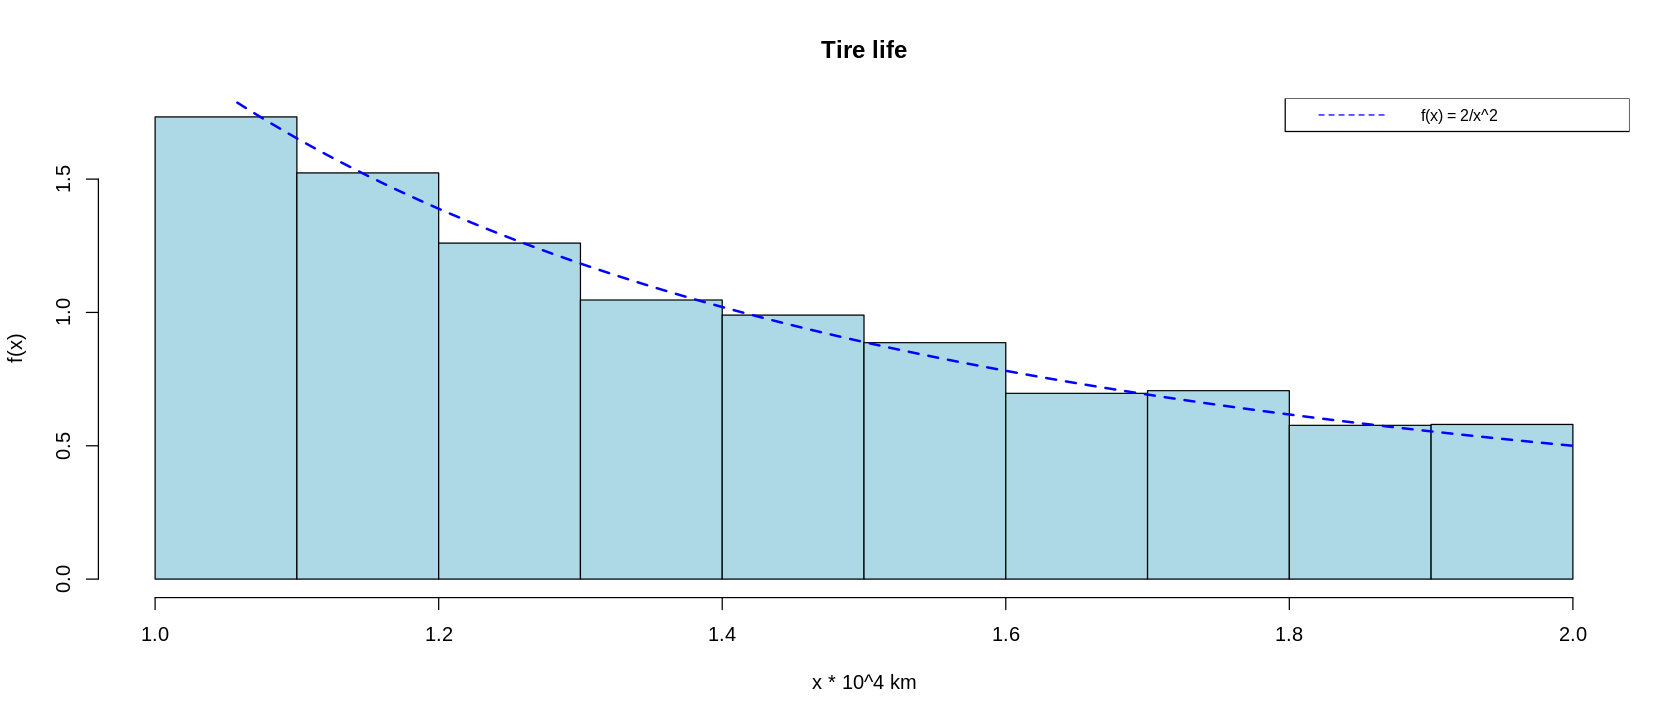

In [11]:
#Sample data
samples <- 3000
x <- rf(samples)

#plot histogram with probability density, NB: prob = T same as writing freq = F
options(repr.plot.width = 14, repr.plot.height = 6)
hist(x, prob = T, main = 'Tire life',  xlab = 'x * 10^4 km', ylab = 'f(x)', col = 'lightblue', breaks = 10)
curve(2/x^2, add = T, lty=2, lwd=2,  col = 'blue') # add = TRUE to stack the two plots
legend('topright', 'f(x) = 2/x^2', col='blue', lty=2, cex=0.8)

In [12]:
# calculate mean and variance
mean_x <-mean(x)
x_squared <- x^2
mean_x_squared <- mean(x_squared)
var <- mean_x_squared - mean_x ^2
paste('mean:', round(mean_x*10^4, 0) , 'km, variance :', round(var*10^4, 0), 'km')

[1] "mean: 13931 km, variance : 800 km"

Notice that the expected values of the $E[x]$ and the $Var(x)$ are:
 
 $E[x] = \int_{\rm I\!R}\frac{2}{x}dx = 2\log(2) \simeq 1.386 $, so in kilometers the mean value is $ Mean \  \ lifetime \simeq 1.386 \cdot 10^4 km $
 
 $Var(x) = E[x^2] - E[x]^2 = 2\int_{\rm I\!R}dx - (2\log(2))^2 = 2 - 4(\log(2))^2 \simeq 0.078$  so in kilometers the variance is $Variance \simeq 0.078 \cdot 10^4 km $